In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

Esta parte es la visualización de datos, donde intentaremos 

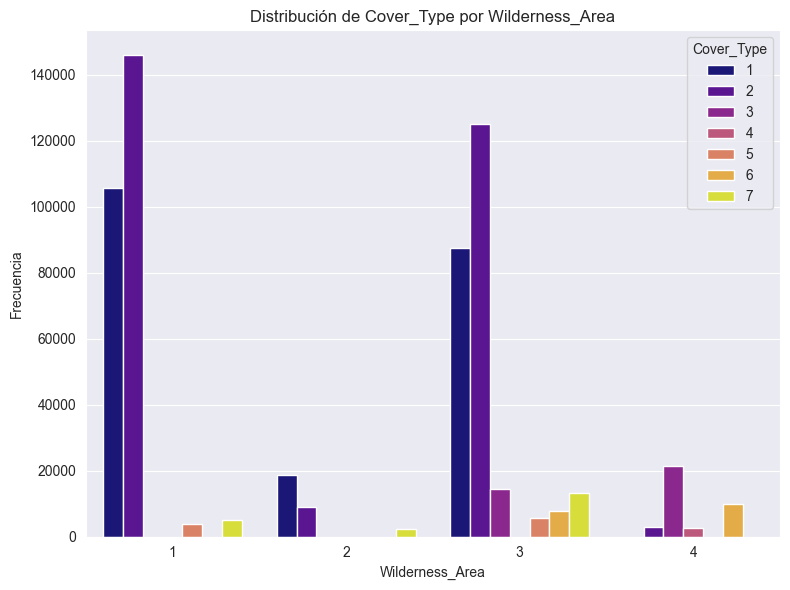

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el dataset
df = pd.read_csv("C:\\Users\\liuji\\Desktop\\covtype.csv")

# Convertir Wilderness_Area a formato categórico (si no lo están)
wilderness_columns = [f"Wilderness_Area{i}" for i in range(1, 5)]

# Crear columna para identificar el área salvaje (Wilderness_Area) más relevante por fila
df['Wilderness_Area'] = df[wilderness_columns].idxmax(axis=1).str.replace('Wilderness_Area', '').astype(int)

# Gráfica de distribución para Wilderness_Area
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Wilderness_Area', hue='Cover_Type', palette='plasma')
plt.title("Distribución de Cover_Type por Wilderness_Area")
plt.xlabel("Wilderness_Area")
plt.ylabel("Frecuencia")
plt.legend(title="Cover_Type")
plt.tight_layout()
plt.show()


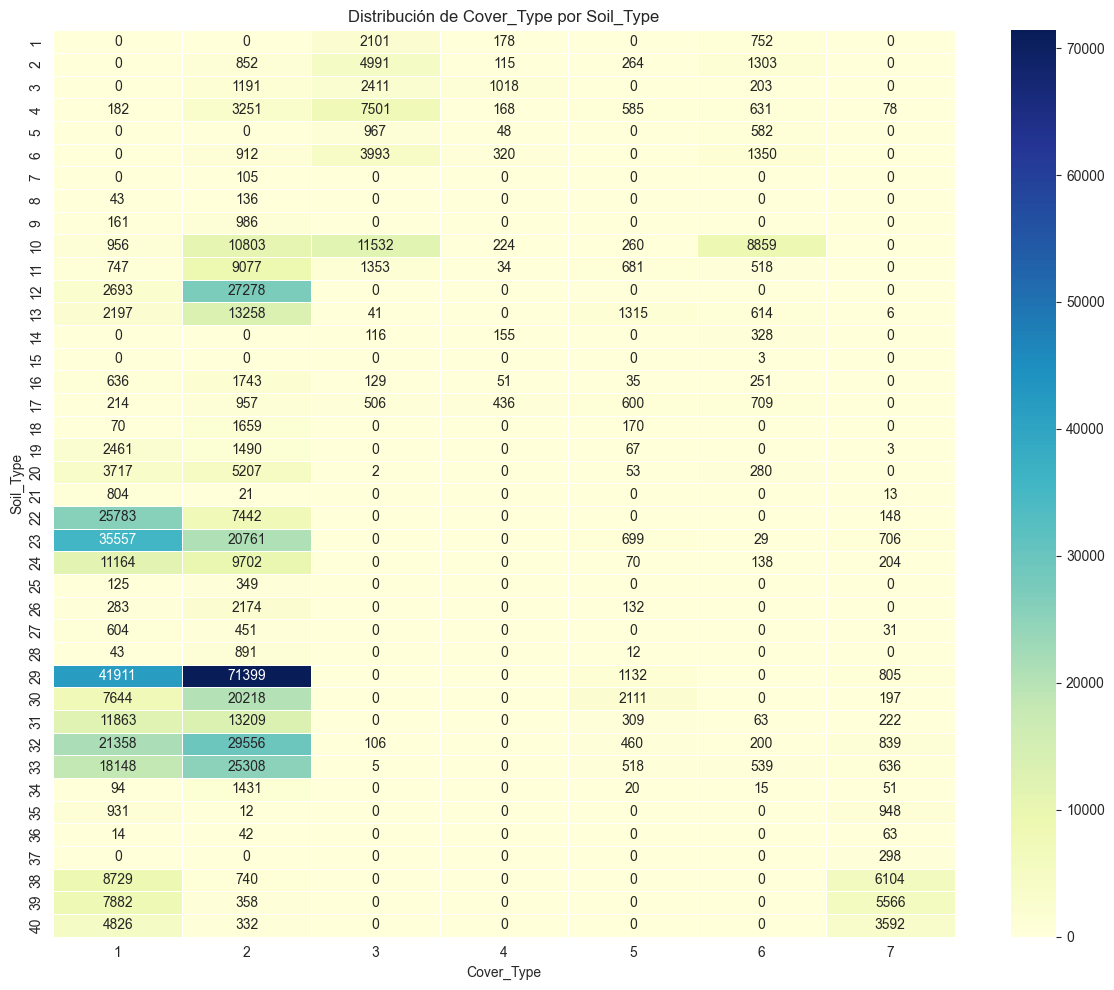

In [30]:
# Convertir Soil_Type a una única columna categórica
soil_columns = [f"Soil_Type{i}" for i in range(1, 41)]
df['Soil_Type'] = df[soil_columns].idxmax(axis=1).str.replace('Soil_Type', '').astype(int)

# Crear una tabla de frecuencias para el heatmap
soil_cover_counts = df.groupby(['Soil_Type', 'Cover_Type']).size().unstack(fill_value=0)

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(soil_cover_counts, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
plt.title("Distribución de Cover_Type por Soil_Type")
plt.xlabel("Cover_Type")
plt.ylabel("Soil_Type")
plt.tight_layout()
plt.show()

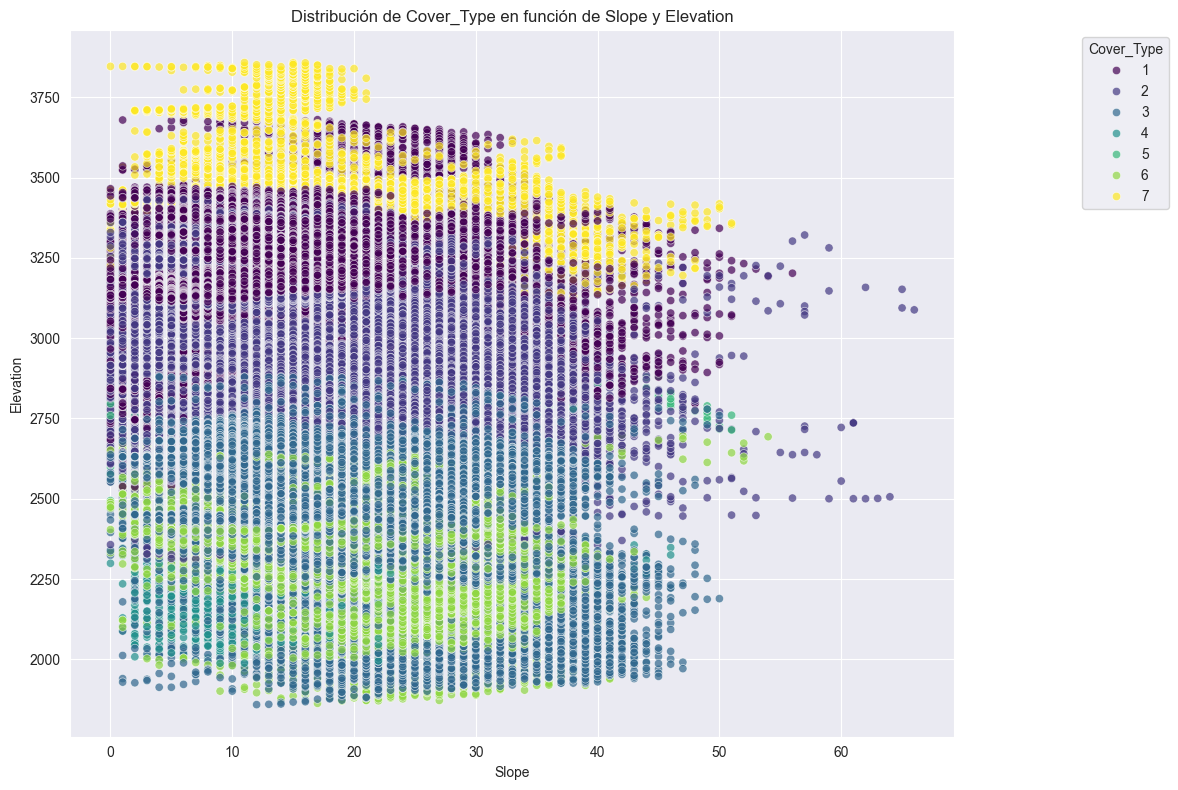

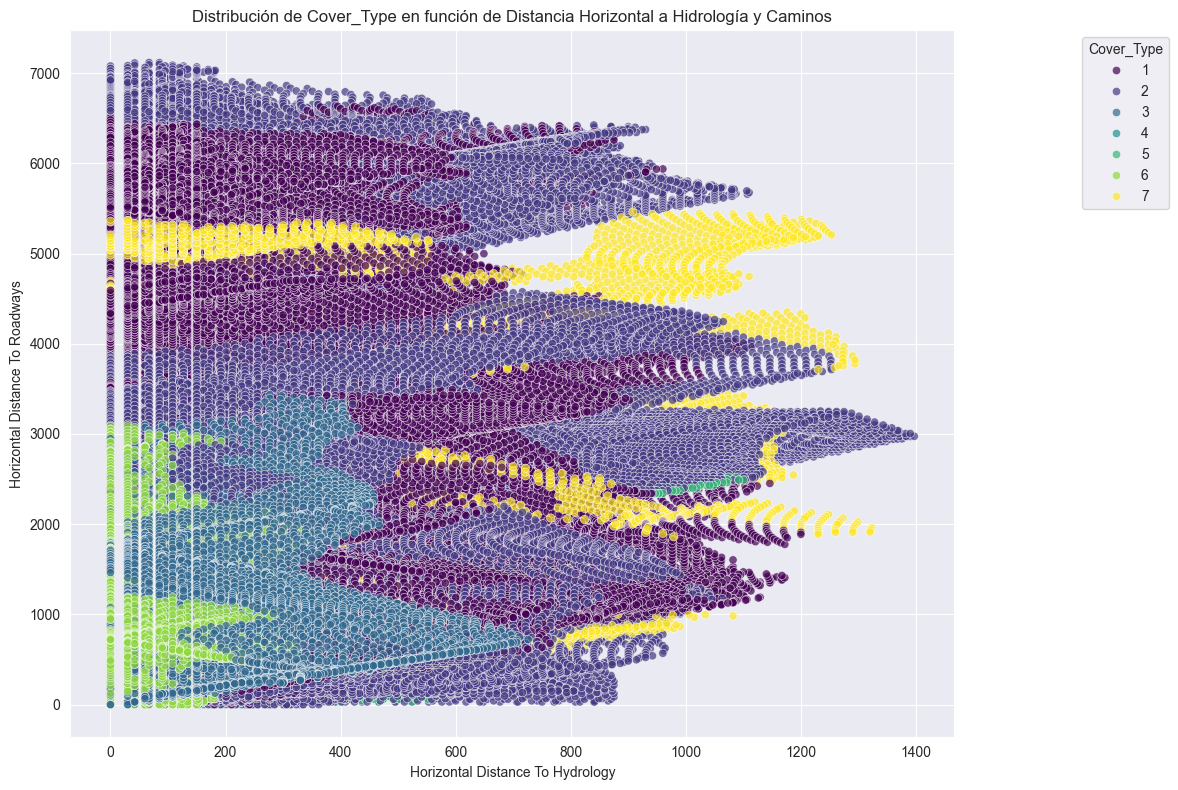

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el dataset
df = pd.read_csv("C:\\Users\\liuji\\Desktop\\covtype.csv")

# Crear un scatter plot con colores para Cover_Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Slope', y='Elevation', hue='Cover_Type', palette='viridis', alpha=0.7)
plt.title("Distribución de Cover_Type en función de Slope y Elevation")
plt.xlabel("Slope")
plt.ylabel("Elevation")
plt.legend(title="Cover_Type", loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Crear un scatter plot con colores para Cover_Type
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Horizontal_Distance_To_Hydrology',
    y='Horizontal_Distance_To_Roadways',
    hue='Cover_Type',
    palette='viridis',
    alpha=0.7
)
plt.title("Distribución de Cover_Type en función de Distancia Horizontal a Hidrología y Caminos")
plt.xlabel("Horizontal Distance To Hydrology")
plt.ylabel("Horizontal Distance To Roadways")
plt.legend(title="Cover_Type", loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


En la primera gráfica, a la primera vista, el Cover Type tiende a variar al mover en el eje Y (Elevation), así suponemos que el Cover Type tiene más que ver con Elevation.
Mientras que en la segunda, donde compara la distancia horizontal a Roadway y Hydrology, no se puede sacar una tendencia clara.

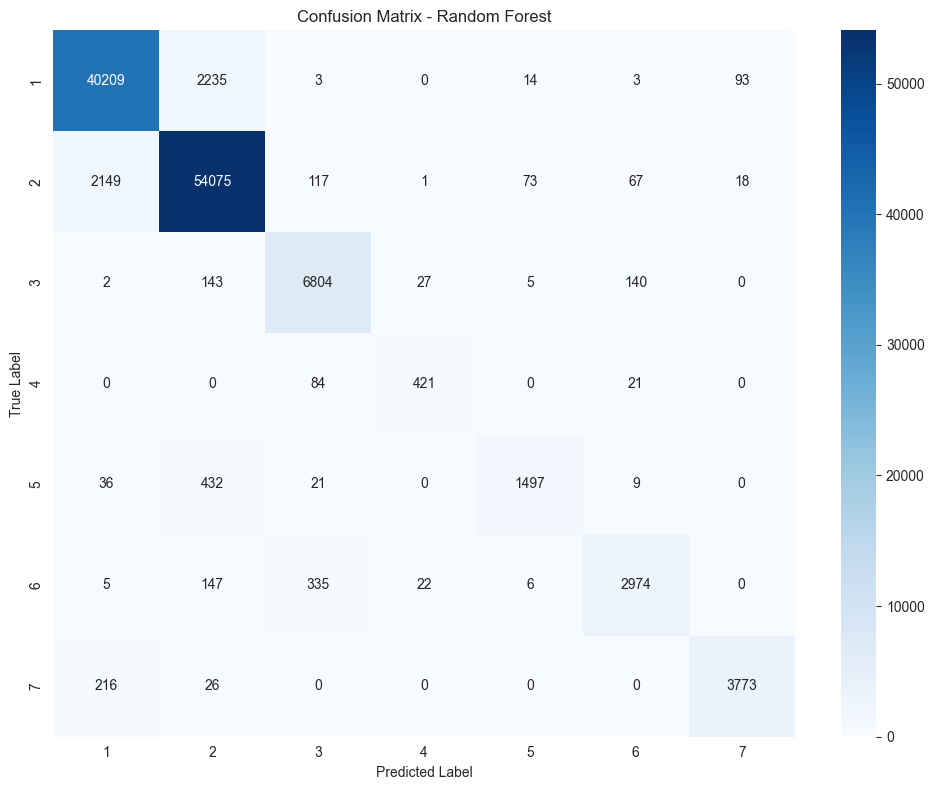

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.96      0.95     56500
           3       0.92      0.96      0.94      7121
           4       0.89      0.80      0.84       526
           5       0.94      0.75      0.83      1995
           6       0.93      0.85      0.89      3489
           7       0.97      0.94      0.96      4015

    accuracy                           0.94    116203
   macro avg       0.93      0.89      0.91    116203
weighted avg       0.94      0.94      0.94    116203

Feature Importances:
                               Feature  Importance
0                            Elevation    0.248065
5      Horizontal_Distance_To_Roadways    0.118732
9   Horizontal_Distance_To_Fire_Points    0.113009
3     Horizontal_Distance_To_Hydrology    0.060071
4       Vertical_Distance_To_Hydrology    0.058082
1                               Aspect    0.047168
7 

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\liuji\\Desktop\\covtype.csv")

X = df.drop(columns='Cover_Type')  # Las características
y = df['Cover_Type']  # La columna objetivo

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RandomForest
# Sin especificar h-parametros el resultado de desempeño es casi identico pero mayor tiempo de ejecución, 2 min.
# H-parametros:
#   - n_estimadors a 10 porque al ser más no hay una mejora significativa además tarda mucho
#   - random_state = 42 para que los resultados de cada repetición sea igualito
#   - max_depth = 40, tiempo razonable y mejora bastante desempeño
#   - criterio, sea gini o entropy no influye mucho
#   - min_samples_split = 2, los nodos se dividen con al menos 2 muestras, valor predeterminado,     empeora ligeramente el desempeño al aumentar
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, criterion='gini',
                                  max_depth = 40, min_samples_split = 2)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Mostrar la Confusion Matrix con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Imprimir el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---- NUEVA SECCIÓN: Importancias de las características ----
# Obtener las importancias de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar las características por importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

# Imprimir todas las importancias de características
print("Feature Importances:")
print(features_df)

